# Exploratory data analysis

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

## Access data from Minio

Raw data for the project was uploaded to Minio. From Jupyter and VSCode, we can access it via the mounted `shared-storage` volume:

In [2]:
DIR_MINIO = "../../../../shared-storage/ny-price-estimator/data"
DIR_DATA_RAW = Path(DIR_MINIO) / "base"
DIR_DATA_PROCESSED = Path(DIR_MINIO) / "created"

In [3]:
os.listdir(DIR_DATA_RAW)

['listings.csv']

^ This is the file as downloaded from [Inside Airbnb](http://insideairbnb.com/get-the-data.html) under the Creative Commons Universal licence (CC0 1.0).

In [4]:
FILEPATH_DATA = DIR_DATA_RAW / "listings.csv"

In [5]:
df_raw = pd.read_csv(FILEPATH_DATA)
df_raw.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (43,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,15509,https://www.airbnb.com/rooms/15509,20181103152857,2018-11-04,Sleep at the CozySuite Sanctuary,Self catering lodging / vacation rental --fu...,We welcome travelers to CozySuite to sleep by ...,Self catering lodging / vacation rental --fu...,none,NaN,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,7,0.13
1,2515,https://www.airbnb.com/rooms/2515,20181103152857,2018-11-04,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
2,2539,https://www.airbnb.com/rooms/2539,20181103152857,2018-11-04,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.25
3,2595,https://www.airbnb.com/rooms/2595,20181103152857,2018-11-04,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.35
4,15729,https://www.airbnb.com/rooms/15729,20181103152857,2018-11-04,Village Green,NaN,Beautiful bedroom in a duplex house with large...,Beautiful bedroom in a duplex house with large...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.21


## Explore data processing

In [6]:
df_raw.shape

(50968, 96)

### Select columns

In [7]:
df_raw.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

For an initial model, we are only going to use a small subset of the columns.

In [8]:
COLUMNS = ['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'zipcode', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price']

In [9]:
df = df_raw[COLUMNS].copy()
df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood'}, inplace=True)
df.head()

,id,neighbourhood,property_type,room_type,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price
0,15509,Brooklyn,Apartment,Private room,11221,40.685384,-73.932709,2,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Heating,""Lock on b...",$59.00
1,2515,Manhattan,Apartment,Private room,10026,40.799205,-73.953676,3,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$59.00
2,2539,Brooklyn,Apartment,Private room,11218,40.647486,-73.972370,4,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",$149.00
3,2595,Manhattan,Apartment,Entire home/apt,10018,40.753621,-73.983774,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00
4,15729,Brooklyn,House,Private room,11231,40.676947,-74.011209,4,1.0,1.0,1.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Pets allowed...",$89.00


### Check for missing values

In [10]:
df.isna().sum()

id                 0
neighbourhood      0
property_type      0
room_type          0
zipcode          779
latitude           0
longitude          0
accommodates       0
bathrooms         98
bedrooms          56
beds              61
bed_type           0
amenities          0
price              0
dtype: int64

In [11]:
df = df.dropna(axis=0)

### Check the target variable

In [12]:
# Convert string to numeric
df['price'] = df['price'].str.extract(r"(\d+).")
df['price'] = df['price'].astype(int)

In [13]:
# Summary statistics

df['price'].describe()

count    50015.000000
mean       139.633770
std        113.033383
min          0.000000
25%         68.500000
50%        105.000000
75%        175.000000
max        999.000000
Name: price, dtype: float64

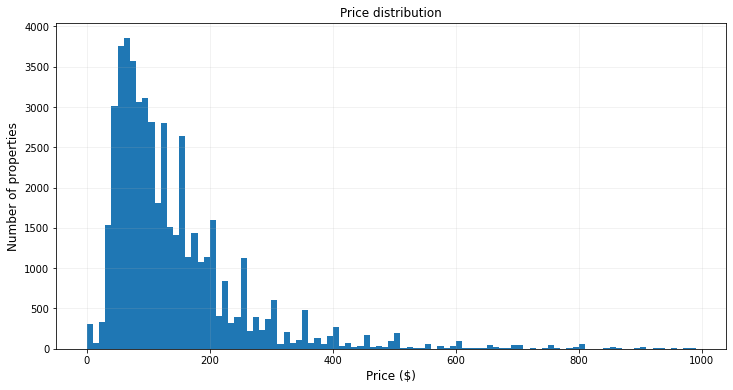

In [14]:
# Plot price distribution

fontsize_labels = 12

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['price'], bins=range(0, max(df['price']), 10))
ax.grid(alpha=0.2)
ax.set_title('Price distribution', fontsize=fontsize_labels)
ax.set_ylabel('Number of properties', fontsize=fontsize_labels)
ax.set_xlabel('Price ($)', fontsize=fontsize_labels)
plt.show()

Remove the listings where price is between \\$0 and \\$10.

In [15]:
df = df[df['price'] >= 10]

NameError: name 'fontsize' is not defined

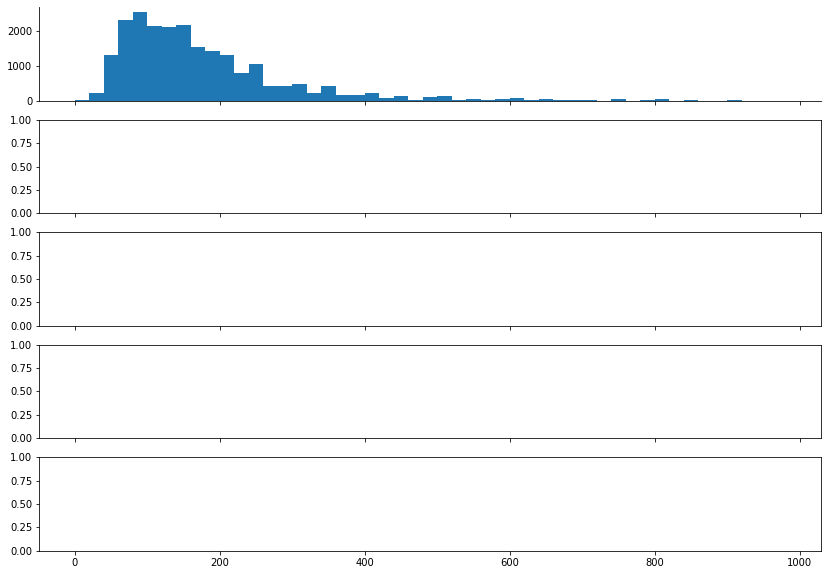

In [16]:
# Break down by neighbourhood:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(14, 10), sharex=True)

axes = [ax1, ax2, ax3, ax4, ax5]
neighbourhood = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']

for i, ax in enumerate(axes):
    values = df[df['neighbourhood'] == neighbourhood[i]]['price']
    avg = round(values.mean(), 1)
    ax.hist(values, bins=range(0, max(df['price']), 20))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{neighbourhood[i]}. Avg price: ${avg}', fontsize=fontsize)
    ax.set_ylabel('Count', fontsize=fontsize_labels)

ax.set_xlabel('Price ($)', fontsize=fontsize_labels)

plt.tight_layout()
plt.show()

In [ ]:
# Create a categorical price column:

df['category'] = pd.cut(df['price'], bins=[10, 90, 180, 400, np.inf], labels=[0, 1, 2, 3])
df.head()

In [ ]:
df['category'].value_counts()

### Extract column information for amenities

In [ ]:
def preprocess_amenities_column(df: DataFrame) -> DataFrame:
    
    df['TV'] = df['amenities'].str.contains('TV')
    df['TV'] = df['TV'].astype(int)
    df['Internet'] = df['amenities'].str.contains('Internet')
    df['Internet'] = df['Internet'].astype(int)
    df['Air_conditioning'] = df['amenities'].str.contains('Air conditioning')
    df['Air_conditioning'] = df['Air_conditioning'].astype(int)
    df['Kitchen'] = df['amenities'].str.contains('Kitchen')
    df['Kitchen'] = df['Kitchen'].astype(int)
    df['Heating'] = df['amenities'].str.contains('Heating')
    df['Heating'] = df['Heating'].astype(int)
    df['Wifi'] = df['amenities'].str.contains('Wifi')
    df['Wifi'] = df['Wifi'].astype(int)
    df['Elevator'] = df['amenities'].str.contains('Elevator')
    df['Elevator'] = df['Elevator'].astype(int)
    df['Breakfast'] = df['amenities'].str.contains('Breakfast')
    df['Breakfast'] = df['Breakfast'].astype(int)

    df.drop('amenities', axis=1, inplace=True)
    
    return df


df = preprocess_amenities_column(df)
df.head()